# PySpark



In [7]:
!pip install pyspark
!pip install pyspark_dist_explore

In [8]:
from pyspark import SparkContext
from pyspark.sql import functions as f, SparkSession, Column
from pyspark_dist_explore import hist
import matplotlib.pyplot as plt
from pyspark.ml.fpm import FPGrowth

In [18]:
from google.colab import files
uploaded = files.upload()

Saving Groceries.csv to Groceries.csv


In [30]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("MyApp").getOrCreate()

df = spark.read.csv("Groceries.csv", header=True, inferSchema=True)
df.show(5)

+-------------+----------+----------------+----+-----+---+-----------+
|Member_number|      Date| itemDescription|year|month|day|day_of_week|
+-------------+----------+----------------+----+-----+---+-----------+
|         1808|2015-07-21|  tropical fruit|2015|    7| 21|          1|
|         2552|2015-05-01|      whole milk|2015|    5|  1|          4|
|         2300|2015-09-19|       pip fruit|2015|    9| 19|          5|
|         1187|2015-12-12|other vegetables|2015|   12| 12|          5|
|         3037|2015-01-02|      whole milk|2015|    1|  2|          4|
+-------------+----------+----------------+----+-----+---+-----------+
only showing top 5 rows



In [22]:
df.printSchema()

root
 |-- Member_number: integer (nullable = true)
 |-- Date: date (nullable = true)
 |-- itemDescription: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- day: integer (nullable = true)
 |-- day_of_week: integer (nullable = true)



In [23]:
num_baskets = df.groupBy("Member_number").count()
num_baskets.show(5)

+-------------+-----+
|Member_number|count|
+-------------+-----+
|         1959|   19|
|         1088|    9|
|         4818|    8|
|         2659|   16|
|         1580|   16|
+-------------+-----+
only showing top 5 rows



(array([302., 328., 178., 371., 237., 341., 251., 538., 252., 192., 179.,
        144., 136., 109.,  69., 110.,  49.,  23.,  29.,  14.,  11.,   9.,
         13.,   4.,   1.,   4.,   0.,   3.,   0.,   1.]),
 array([ 2.        ,  3.13333333,  4.26666667,  5.4       ,  6.53333333,
         7.66666667,  8.8       ,  9.93333333, 11.06666667, 12.2       ,
        13.33333333, 14.46666667, 15.6       , 16.73333333, 17.86666667,
        19.        , 20.13333333, 21.26666667, 22.4       , 23.53333333,
        24.66666667, 25.8       , 26.93333333, 28.06666667, 29.2       ,
        30.33333333, 31.46666667, 32.6       , 33.73333333, 34.86666667,
        36.        ]),
 <BarContainer object of 30 artists>)

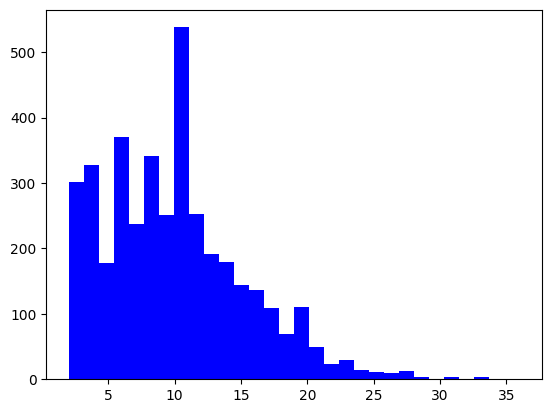

In [24]:
fig, ax = plt.subplots()

hist(ax, num_baskets.select('count'), bins = 30, color=['blue'])

In [27]:
columns = ['basket']
new_data = [(['ham', 'yogurt', 'light bulbs'],), (['jam', 'cocoa drinks', 'pet care'],)]
rdd = spark.sparkContext.parallelize(new_data)
new_df = rdd.toDF(columns)
new_df.printSchema()
new_df.show(2,False)

root
 |-- basket: array (nullable = true)
 |    |-- element: string (containsNull = true)

+-----------------------------+
|basket                       |
+-----------------------------+
|[ham, yogurt, light bulbs]   |
|[jam, cocoa drinks, pet care]|
+-----------------------------+

